In [ ]:
# 
# 

# Generate alpha factor values for news sentiments - FINAL SUBMIT

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd
from pandas import date_range
import matplotlib.pyplot as plt
import datetime
import time
import dill
import pyfolio as pf
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr

# Preparing the news table for join

In [7]:
# news0=pd.read_csv('./data/news0to10000.csv')[0:10000]
# news1=pd.read_csv('./data/news10000to20000headline.csv')[10000:20000]
# news2=pd.read_csv('./data/news20000to30000headline.csv')[20000:30000]
# news3=pd.read_csv('./data/news30000to40000headline.csv')[30000:40000]
# news4=pd.read_csv('./data/news40000to50000.csv')[40000:50000]
# news5=pd.read_csv('./data/news50000to60000headline.csv')[50000:60000]
# news6=pd.read_csv('./data/news60000to70000headline.csv')[60000:70000]
# news7=pd.read_csv('./data/news70000to80000headline.csv')[70000:80000]
# news8=pd.read_csv('./data/news80000to90000headline.csv')[80000:90000]
# news9=pd.read_csv('./data/news90000to100000headline.csv')[90000:100000]
# news10=pd.read_csv('./data/news100000to110000headline.csv')[100000:110000]
# news11=pd.read_csv('./data/news110000to120000.csv')[110000:120000]
# news12=pd.read_csv('./data/news120000to130000.csv')[120000:130000]
# news13=pd.read_csv('./data/news130000to140000.csv')[130000:140000]
# news14=pd.read_csv('./data/news140000to150000.csv')[140000:150000]
# news15=pd.read_csv('./data/news150000to160000.csv')[150000:160000]
# news16=pd.read_csv('./data/news160000to170000.csv')[160000:170000]
# news17=pd.read_csv('./data/news170000to180000.csv')[170000:180000]
# news18=pd.read_csv('./data/news180000to200000.csv')[180000:200000]
# news19=pd.read_csv('./data/news200000to250000.csv')[200000:250000]
# news20=pd.read_csv('./data/news250000to300000.csv')[250000:300000]
# news21=pd.read_csv('./data/news300000to350000.csv')[300000:350000]
# news22=pd.read_csv('./data/news350000to400000.csv')[350000:400000]
# news23=pd.read_csv('./data/news400000to500000.csv')[400000:450000]
# news24=pd.read_csv('./data/news450000to550000.csv')[450000:550000]
# news25=pd.read_csv('./data/news550000to650000.csv')[550000:650000]
# news26=pd.read_csv('./data/news650000to694898.csv')[650000:694898]
# news27=pd.read_csv('./data/news694898to750000.csv')[694898:750000]
# news28=pd.read_csv('./data/news750000to850000.csv')[750000:850000]
# news29=pd.read_csv('./data/news850000to950000.csv')[850000:950000]
# news30=pd.read_csv('./data/news950000to1050000.csv')[950000:1050000]
# news31=pd.read_csv('./data/news1050000to1100000.csv')[1050000:1100000]
# news32=pd.read_csv('./data/news1100000to1150000.csv')[1100000:1150000]
# news33=pd.read_csv('./data/news1150000to1250000.csv')[1150000:1250000]
# news34=pd.read_csv('./data/news1250000to1350000.csv')[1250000:1350000]
# news35=pd.read_csv('./data/news1250000to1418418.csv')[1350000:1418418]
# news36=pd.read_csv('./data/news1418418and1418419.csv')[1418418:1418419]

# frames = [news0, news1, news2, news3, news4, news5, \
#           news6, news7, news8, news9, news10,\
#           news11, news12, news13, news14, news15,\
#           news16, news17, news18, news19, news20,\
#           news21, news22, news23, news24, news25,\
#           news26, news27, news28, news29, news30,\
#           news31, news32, news33, news34, news35, news36]

# news = pd.concat(frames).drop_duplicates(keep='first')
# news.to_csv('./data/news_score_raw_withHeadlineAndMessageBody.csv', header=True)

## Remove zeros, nulls, neutral sentiments

In [12]:
news = pd.read_csv('./data/news_score_raw_withHeadlineAndMessageBody.csv')
# news = news.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
# news = news.drop(columns=['headline','message_body'])
news.tail()

,Unnamed: 0,asset,date,headline,message_body,score
1418414,1418414,YZCAY,2015-12-23 13:15:00+00:00,Where We Are Headed - Featured Research on Uni...,"[Accesswire] - NEW YORK, NY / ACCESSWIRE / Dec...",0.931782
1418415,1418415,YZCAY,2015-12-21 08:12:18+00:00,NCIG Holdings Pty Ltd -- Moody's places NCIG's...,NCIG Holdings Pty Ltd -- Moody's places NCIG's...,1.988582
1418416,1418416,YZCAY,2015-11-20 07:09:04+00:00,Yanzhou Coal Mining Co. Ltd. -- Moody's: Yanzh...,Yanzhou Coal Mining Co. Ltd. -- Moody's: Yanzh...,0.012648
1418417,1418417,YZCAY,2015-11-03 11:23:04+00:00,Yanzhou Coal Mining Co. Ltd. -- Moody's downgr...,Yanzhou Coal Mining Co. Ltd. -- Moody's downgr...,0.012648
1418418,1418418,YZCAY,2015-09-16 17:15:00+00:00,The 7 Biggest Chinese Mining Companies,The 7 Biggest Chinese Mining Companies,0.971568


In [13]:
news.score.describe()

count    1.418419e+06
mean     5.347355e-01
std      9.052221e-01
min     -1.999984e+00
25%      6.106741e-03
50%      6.211384e-01
75%      1.002774e+00
max      1.999988e+00
Name: score, dtype: float64

In [14]:
news = news[(news.T != 0).any()]
news.score.describe()

KeyboardInterrupt: 

In [ ]:
news.to_csv('./data/news_score_raw_withHeadlineAndMessageBody.csv', header=True)

## Visual examine the periodicity of news sentiment periodicity and propagation

In [ ]:
news = pd.read_csv('./data/news_score_raw_withHeadlineAndMessageBody.csv')

In [ ]:
news['utc']=pd.DatetimeIndex(news['date']).tz_localize(None)
news['year']=pd.DatetimeIndex(news['utc']).year
news['day']=pd.DatetimeIndex(news['utc']).day
news['weekday']=pd.DatetimeIndex(news['utc']).weekday
news['hour']=pd.DatetimeIndex(news['utc']).hour
# news['date_string']=pd.DatetimeIndex(news['date']).strftime('%Y-%m-%d')
# news['date_from_string']=pd.to_datetime(news['date_string'], format='%Y-%m-%d', errors='coerce')
news['date']=pd.DatetimeIndex(news['date']).round('D').date
news.head()

Options to localize if using Alphalens library later (instead of my own functions)
news['utc_localize']=pd.DatetimeIndex(news['date']).tz_localize('utc', ambiguous='infer') 
ERROR: "Already tz-aware, use tz_convert to convert." this error is generated immediately

news['utc_convert'] = pd.DatetimeIndex(news['date']).tz_convert('utc', ambiguous='infer')
ERROR: "tz_convert() got an unexpected keyword argument 'ambiguous' " this error is generated immediately

Note, although tz convert does not generate error now, it does when using alphalens:
news['utc_convert'] = pd.DatetimeIndex(news['date']).tz_convert('utc', ambiguous='infer')

Error note: resampling does not work. AVOID:
* news.groupby("asset")['score']['utc'].resample('H').count().plot()
* news.groupby("asset")['utc'].resample('H').count().plot()

#### Sentiment distribution of ONE DAY (by hour)

In [ ]:
sns.set(color_codes=True)
sns.jointplot(x="hour", y="score", data=news, kind="hex", color = "cyan")

In [ ]:
sns.jointplot(x="hour", y="score", data=news, kind="kde", color='cyan')

#### Sentiment distribution of ONE WEEK (by day of the week)
* 0 on x-axis is for Monday
* 5 on x-axis is for Saturday

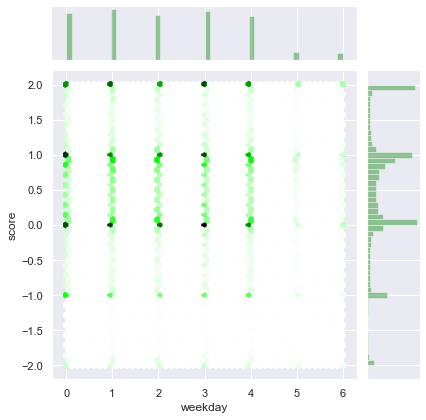

In [7]:
sns.jointplot(x="weekday", y="score", data=news, kind="hex", color='green')

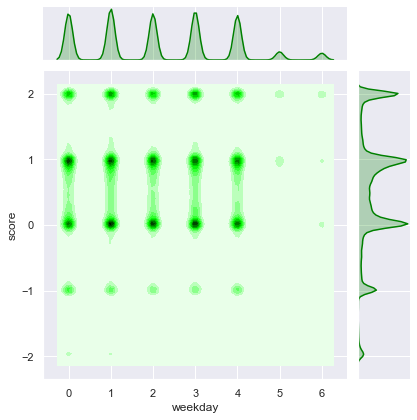

In [8]:
sns.jointplot(x="weekday", y="score", data=news, kind="kde", color='green')

#### Sentiment distribution over ONE MONTH

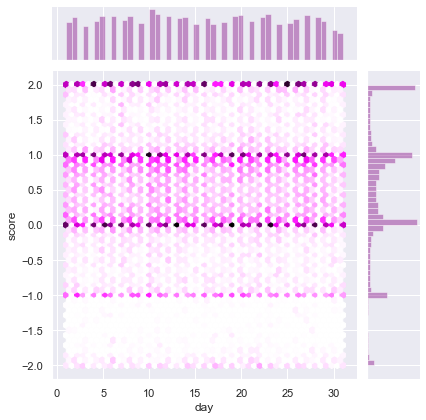

In [9]:
sns.jointplot(x="day", y="score", data=news, kind="hex", color='purple')

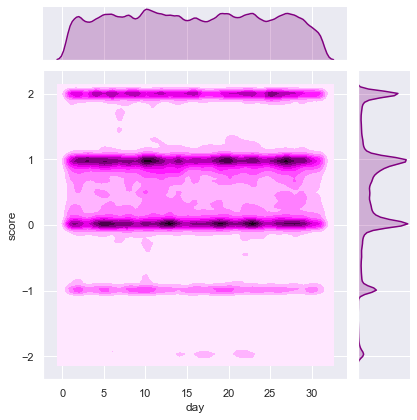

In [10]:
sns.jointplot(x="day", y="score", data=news, kind="kde", color='purple')

#### Sentiment distribution by YEAR

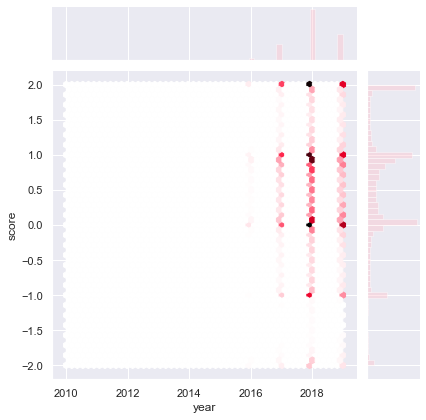

In [11]:
sns.jointplot(x="year", y="score", data=news, kind="hex", color='pink')

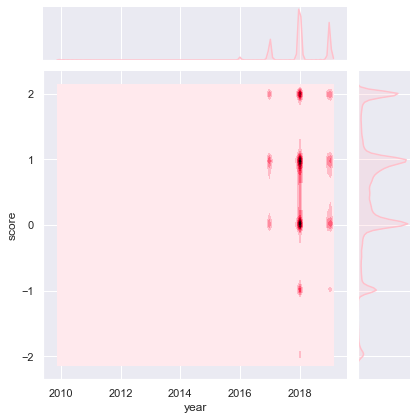

In [12]:
sns.jointplot(x="year", y="score", data=news, kind="kde", color='pink')

Optional: transform news data into series and save as pickle for easy retrieval

In [13]:
news = news.set_index(['date', 'asset'])
news = news.score

with open('./data/news_sentiment_score.pckl', 'wb') as file:
    dill.dump(news, file)

news.tail()

date        asset
2015-12-24  YZCAY    0.931782
2015-12-21  YZCAY    1.988582
2015-11-20  YZCAY    0.012648
2015-11-03  YZCAY    0.012648
2015-09-17  YZCAY    0.971568
Name: score, dtype: float64

# Encode news sentiments

In [15]:
rounded_news = pd.read_csv('./data/news_score_raw_withHeadlineAndMessageBody.csv')
rounded_news = rounded_news.rename(columns = {"date": "datetime"})
rounded_news['datetime']=pd.DatetimeIndex(rounded_news['datetime']).tz_localize(None)
rounded_news['datetime']=pd.DatetimeIndex(rounded_news['datetime']).round('D').date
rounded_news['score'] = rounded_news['score'].apply(lambda x: int(round(x)))
rounded_news.head()

,Unnamed: 0,asset,datetime,headline,message_body,score
0,0,VNET,2019-05-21,Edited Transcript of VNET earnings conference ...,Q1 2019 21Vianet Group Inc Earnings Call,0
1,1,VNET,2019-05-18,Investors Who Bought 21Vianet Group (NASDAQ:VN...,"Long term investing works well, but it doesn't...",2
2,2,VNET,2019-05-17,"21Vianet Group, Inc. (VNET) Q1 2019 Earnings C...",VNET earnings call for the period ending March...,0
3,3,VNET,2019-05-17,21Vianet: 1Q Earnings Snapshot,BEIJING (AP) _ 21Vianet Group Inc. (VNET) on T...,1
4,4,VNET,2019-05-17,"21Vianet Group, Inc. Reports Unaudited First Q...","BEIJING, May 17, 2019 -- 21Vianet Group, Inc. ...",0


In [16]:
rounded_news = rounded_news.drop(columns=['Unnamed: 0', 'headline','message_body'])
rounded_news.tail()

,asset,datetime,score
1418414,YZCAY,2015-12-24,1
1418415,YZCAY,2015-12-21,2
1418416,YZCAY,2015-11-20,0
1418417,YZCAY,2015-11-03,0
1418418,YZCAY,2015-09-17,1


In [17]:
newsencoded = rounded_news.pivot_table(index= ['datetime', 'asset'], columns = ['score'], aggfunc=len)
newsencoded = newsencoded.rename({-2:'StrongNegative1D', -1: 'WeakNegative1D', 0:'Neutral1D', 1:'WeakPositive1D', 2:'StrongPositive1D'}, axis='columns')

with open("./data/newsencoded.pckl", "wb") as f:
    dill.dump(newsencoded, f)

news = newsencoded

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D63F05E6D8>,
      dtype=object)

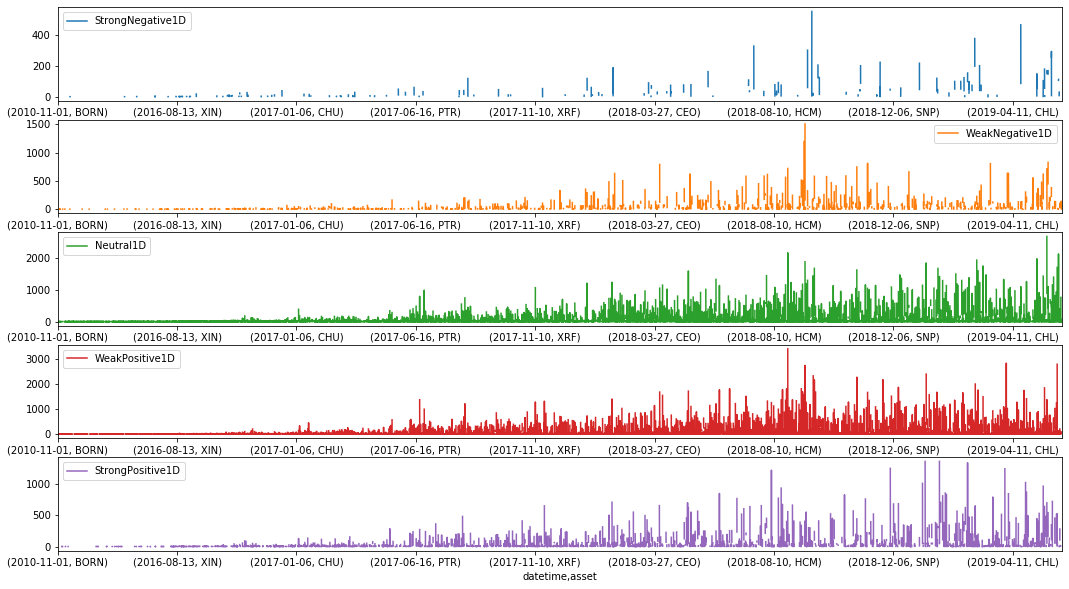

In [18]:
fig, axes = plt.subplots(nrows=5, figsize=(18,10))
newsencoded.plot(ax = axes[:],subplots=True)

# Now merge 20F and 6K cosine similarities

In [19]:
import pickle
def load_pickles():
    
    f = open('./data/sentiments.pckl', 'rb')
    sentiments = pickle.load(f)
    f.close()
    
    f = open('./data/tickerList.pckl', 'rb')
    tickerList= pickle.load(f)
    f.close()
    
    f = open('./data/cosine_similarities_20F.pckl', 'rb')
    cosine_similarities_20F= pickle.load(f)
    f.close()
    
    f = open('./data/cosine_similarities_6K.pckl', 'rb')
    cosine_similarities_6K= pickle.load(f)
    f.close()
    
    f = open('./data/file_dates_20F.pckl', 'rb')
    file_dates_20F = pickle.load(f)
    f.close()
    
    f = open('./data/file_dates_6K.pckl', 'rb')
    file_dates_6K= pickle.load(f)
    f.close()
    
    
    return sentiments, tickerList, cosine_similarities_20F, cosine_similarities_6K, file_dates_20F, file_dates_6K 

sentiments, tickerList, cosine_similarities_20F, cosine_similarities_6K, file_dates_20F, file_dates_6K = load_pickles()

In [20]:
def load_factor_data_20F():
    factors20F = pd.DataFrame()
    d = {}
    for ticker in tickerList:
        for factor in [dict(zip([(date_,ticker) for date_ in file_dates_20F[ticker]], \
                                np.asarray([v for k,v in cosine_similarities_20F[ticker].items()]).T))]:
            d.update(factor)
    factors20F = pd.DataFrame(d, index=sentiments).T
    factors20F.index.set_names(['datetime', 'asset'], inplace=True)
    return factors20F

def load_factor_data_6K():
    factors6K = pd.DataFrame()
    d = {}
    for ticker in tickerList:
        for factor in [dict(zip([(date_,ticker) for date_ in file_dates_6K[ticker]], \
                                np.asarray([v for k,v in cosine_similarities_6K[ticker].items()]).T))]:
            d.update(factor)
    factors6K = pd.DataFrame(d, index=sentiments).T
    factors6K.index.set_names(['datetime', 'asset'], inplace=True)
    factors6K= factors6K.drop_duplicates()
    return factors6K

### Treating quarterly factors

In [21]:
fd_20F = load_factor_data_20F()
fd_20F.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 692 entries, (2019-03-27, VNET) to (2012-04-30, ZAHLY)
Data columns (total 6 columns):
negative        692 non-null float64
positive        692 non-null float64
uncertainty     692 non-null float64
litigious       692 non-null float64
constraining    692 non-null float64
interesting     692 non-null float64
dtypes: float64(6)
memory usage: 38.0+ KB


In [22]:
fd_20F = fd_20F.reset_index().rename({"negative":"negative_Yr", "positive": "positive_Yr", "uncertainty":"uncertainty_Yr", \
                  "litigious": "litigious_Yr", "constraining": "constraining_Yr", \
                   "interesting": "interesting_Yr"}, axis="columns")
fd_20F = fd_20F.set_index(["datetime", "asset"])
fd_20F.head()

,,negative_Yr,positive_Yr,uncertainty_Yr,litigious_Yr,constraining_Yr,interesting_Yr
datetime,asset,,,,,,
2019-03-27,VNET,0.996571,0.995232,0.999520,0.986051,0.996662,0.998904
2018-04-12,VNET,0.993168,0.989786,0.996868,0.985490,0.995370,0.997489
2017-04-12,VNET,0.984623,0.995591,0.999289,0.996604,0.986908,0.985202
2016-04-12,VNET,0.998159,0.992137,0.999152,0.997421,0.997206,0.999518
2015-04-10,VNET,0.991378,0.976363,0.999391,0.992658,0.984905,0.988532


In [23]:
def resample_data(factors,resampletime):
    ufactors = factors.unstack()
    ufactors = ufactors.set_index(pd.DatetimeIndex(ufactors.index)).tz_localize(None)
    #ufactors = ufactors.set_index(pd.DatetimeIndex(ufactors.index)).interpolate(method='pchip').
#     ufactors = pf.utils.to_utc(ufactors) 
    factors = ufactors.stack()
    factors[np.isclose(factors,0)]=np.nan
    return factors

def timezoneset(factors):
    ufactors = factors.unstack()
    ufactors = ufactors.set_index(pd.DatetimeIndex(ufactors.index)).tz_localize(None) #.interpolate(method='pchip')
#     ufactors = pf.utils.to_utc(ufactors) 
    factors = ufactors.stack()
    factors[np.isclose(factors,0)]=np.nan
    return factors

In [24]:
resampled20F_1CalDay = resample_data(fd_20F, "C")
resampled20F_1day = resample_data(fd_20F, "B")
resampled20F_monthly = resample_data(fd_20F, "M")
resampled20F_quarterly = resample_data(fd_20F, "Q")
resampled20F_182days = resample_data(fd_20F, "182d")
resampled20F_365days = resample_data(fd_20F, "365d")

In [25]:
fd_20F = timezoneset(fd_20F)

In [32]:
fd_20F

negative_Yr  positive_Yr  uncertainty_Yr  litigious_Yr  \
datetime   asset                                                           
2002-06-13 CHL       0.940365     0.953912        0.993711      0.990532   
2003-05-13 CEO       0.967035     0.980075        0.987644      0.994199   
2003-06-16 HNP            NaN     0.056585             NaN           NaN   
2003-06-17 CHL       0.938671     0.973900        0.990295      0.983164   
2003-06-19 SNP            NaN     0.032147             NaN           NaN   
2003-06-23 ACH            NaN     0.008700             NaN           NaN   
           CHU            NaN     0.022371             NaN           NaN   
2003-06-25 ACH       0.995030     0.999768        0.999822      0.999847   
           PTR       0.930102     0.986088        0.985490      0.949408   
2003-06-26 CEA            NaN     0.043661             NaN           NaN   
           GSH            NaN     0.015961             NaN           NaN   
2003-06-27 NTES           NaN     0.034212             NaN           NaN   
           YZCAY          NaN          NaN             NaN           NaN   
2003-06-30 SHI            NaN     0.080963             NaN           NaN   
           ZNH            NaN          NaN             NaN           NaN   
2004-03-31 CHA       0.964234     0.983917        0.996286      0.916871   
2004-04-16 HNP       0.957480     0.959342        0.983840      0.985144   
2004-06-17 CHL       0.910112     0.965168        0.994110      0.968860   
           SHI       0.978748     0.978413        0.993268      0.972840   
2004-06-22 SNP       0.813380     0.937073        0.930909      0.587559   
2004-06-23 CEO       0.862078     0.874202        0.895303      0.666489   
2004-06-24 CHU       0.912547     0.979867        0.995206      0.992546   
2004-06-28 CEA       0.955363     0.990378        0.997272      0.969905   
           PTR       0.969725     0.989809        0.995981      0.994296   
2004-06-29 GSH       0.970062     0.978282        0.995109      0.965386   
           NTES      0.961333     0.967734        0.997586      0.955688   
2004-06-30 ACH       0.978311     0.960987        0.993837      0.980633   
           YZCAY     0.928497     0.958411        0.972224      0.944051   
           ZNH       0.917832     0.963674        0.996404      0.945871   
2005-04-18 HNP       0.973280     0.971687        0.793729      0.960350   
...                       ...          ...             ...           ...   
2019-04-26 YY        0.993823     0.986572        0.999089      0.992880   
           ZNH       0.958989     0.982915        0.995435      0.917445   
           ZXAIY     0.989780     0.997468        0.998980      0.997775   
2019-04-29 CHA       0.913804     0.969260        0.994388      0.946424   
           CHL       0.979934     0.987609        0.996557      0.864719   
           LITB      0.986865     0.985850        0.999649      0.991455   
           NCTY      0.993559     0.988778        0.999216      0.994002   
           PTR       0.984552     0.985473        0.997756      0.964974   
           SECO      0.993911     0.995562        0.999386      0.997856   
           SHI       0.973438     0.976724        0.989149      0.988649   
           SNP       0.986895     0.985837        0.995424      0.987604   
           SOL       0.996204     0.993158        0.999604      0.978545   
           WB        0.996147     0.994432        0.999735      0.995173   
           XIN       0.982434     0.976278        0.997409      0.991114   
           XNET      0.995821     0.990571        0.999830      0.997166   
           YRD       0.976287     0.987273        0.998371      0.965304   
2019-04-30 AMCN      0.976394     0.980557        0.999484      0.995690   
           ATV       0.980775     0.989508        0.998966      0.981978   
           CCM       0.992010     0.989569        0.998377      0.995403   
           FANH      0.972789     0.975842        0.997490      0.

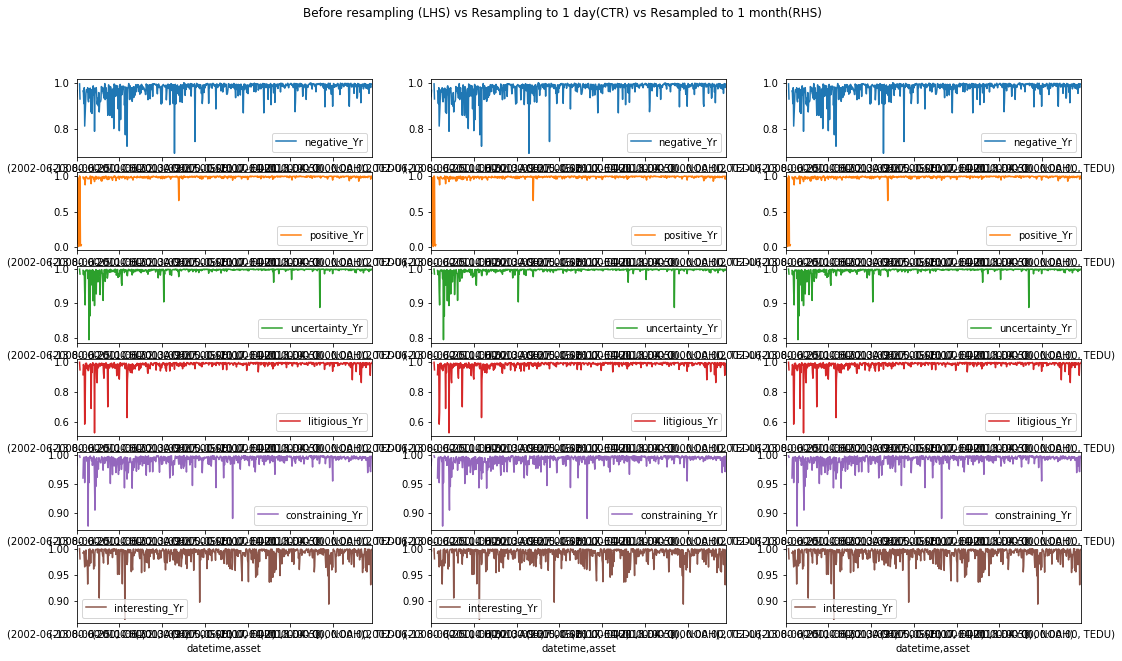

In [33]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(18,10))

fd_20F.plot(ax = axes[:,0],subplots=True, title="Before resampling (LHS) vs Resampling to 1 day(CTR) vs Resampled to 1 month(RHS)")
resampled20F_1day.plot(ax = axes[:,1],subplots=True)
resampled20F_monthly.plot(ax = axes[:,2],subplots=True)
plt.show()

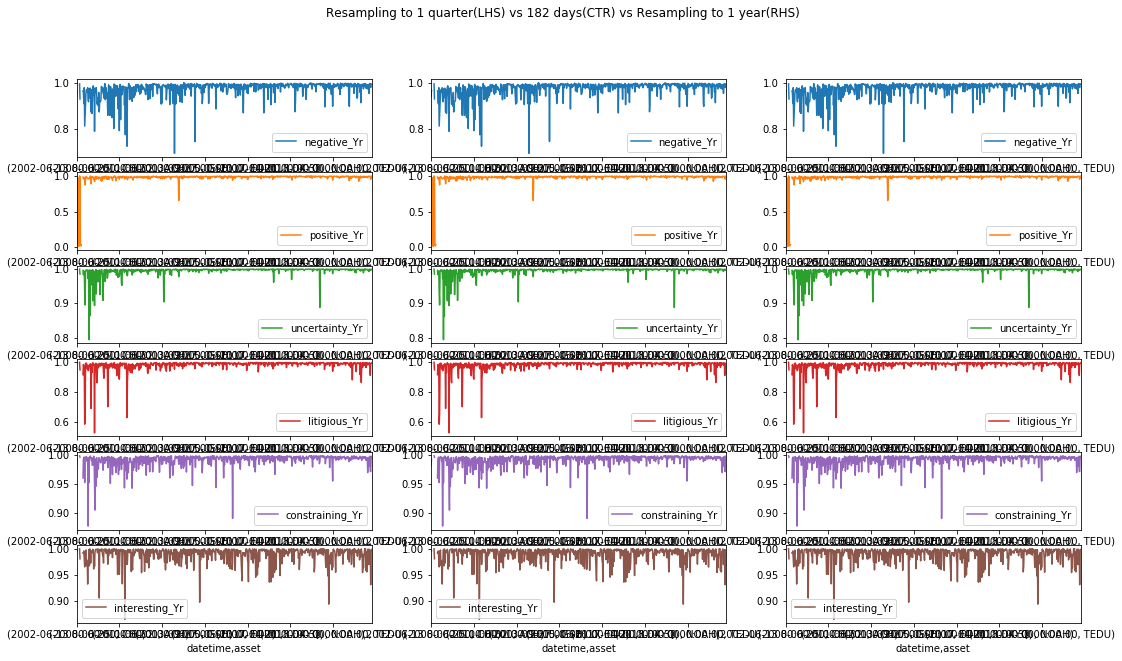

In [34]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(18,10))
resampled20F_quarterly.plot(ax = axes[:,0],subplots=True)
resampled20F_182days.plot(ax = axes[:,1],subplots=True, title="Resampling to 1 quarter(LHS) vs 182 days(CTR) vs Resampling to 1 year(RHS)")
resampled20F_365days.plot(ax = axes[:,2],subplots=True)
plt.show()

### Treating quarterly factors

In [35]:
fd_6K = load_factor_data_6K()
fd_6K.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2306 entries, (2019-05-17, YI) to (2011-05-19, ZAHLY)
Data columns (total 6 columns):
negative        2306 non-null float64
positive        2306 non-null float64
uncertainty     2306 non-null float64
litigious       2306 non-null float64
constraining    2306 non-null float64
interesting     2306 non-null float64
dtypes: float64(6)
memory usage: 131.4+ KB


In [36]:
fd_6K = fd_6K.reset_index()
fd_6K = fd_6K.rename({"negative":"negative_Qr", "positive": "positive_Qr", "uncertainty":"uncertainty_Qr", \
                  "litigious": "litigious_Qr", "constraining": "constraining_Qr", \
                   "interesting": "interesting_Qr"}, axis="columns")
fd_6K.head()

,datetime,asset,negative_Qr,positive_Qr,uncertainty_Qr,litigious_Qr,constraining_Qr,interesting_Qr
0,2019-05-17,YI,1.000000,0.0,1.0,1.000000,1.000000,0.000000
1,2019-05-16,YI,1.000000,0.0,0.0,1.000000,1.000000,0.000000
2,2019-05-17,VNET,1.000000,0.0,0.0,1.000000,1.000000,0.000000
3,2019-04-01,VNET,0.065197,0.0,0.0,0.178999,0.157097,0.000000
4,2019-03-29,VNET,0.065197,0.0,0.0,0.178999,0.157097,0.973373


In [37]:
fd_6K.datetime = pd.DatetimeIndex(fd_6K.datetime)
fd_6K = fd_6K.set_index(["datetime", "asset"])

In [38]:
resampled6K_1Hr = resample_data(fd_6K, "H")
resampled6K_1Calday = resample_data(fd_6K, "C")
resampled6K_1Bizday = resample_data(fd_6K, "B")
resampled6K_weekly = resample_data(fd_6K, "7d")
resampled6K_monthly = resample_data(fd_6K, "M")
resampled6K_quarterly = resample_data(fd_6K, "Q")
resampled6K_182days = resample_data(fd_6K, "182d")

In [39]:
fd_6K = timezoneset(fd_6K)

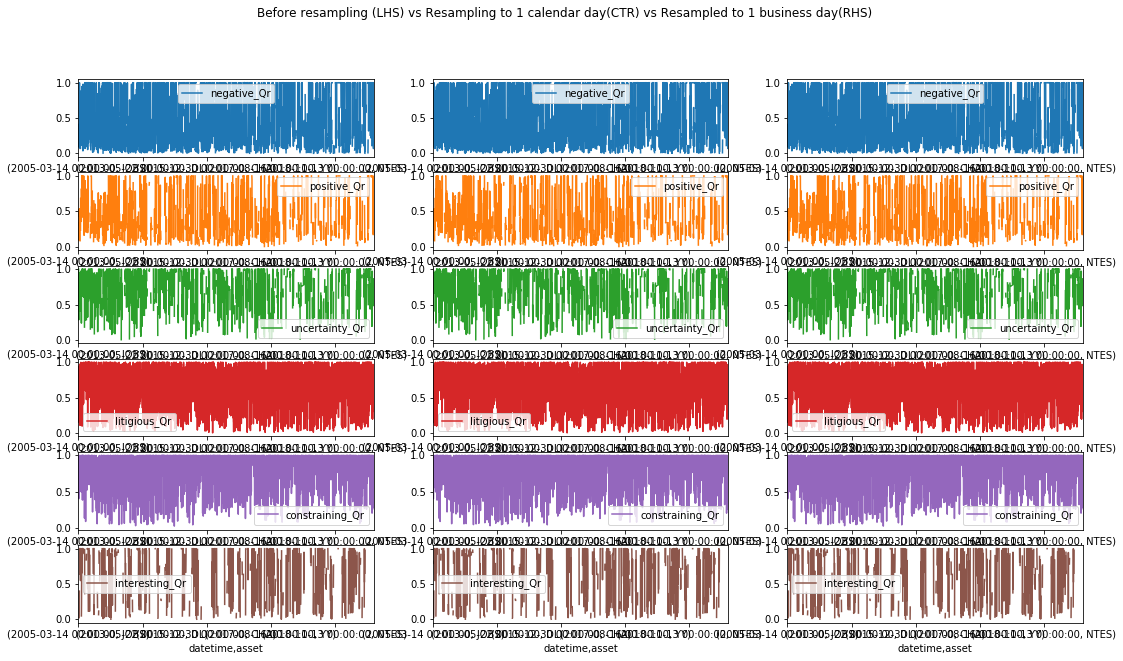

In [40]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(18,10))
fd_6K.plot(ax = axes[:,0],subplots=True, title="Before resampling (LHS) vs Resampling to 1 calendar day(CTR) vs Resampled to 1 business day(RHS)")
resampled6K_1Calday.plot(ax = axes[:,1],subplots=True)
resampled6K_1Bizday.plot(ax = axes[:,2],subplots=True)
plt.show()

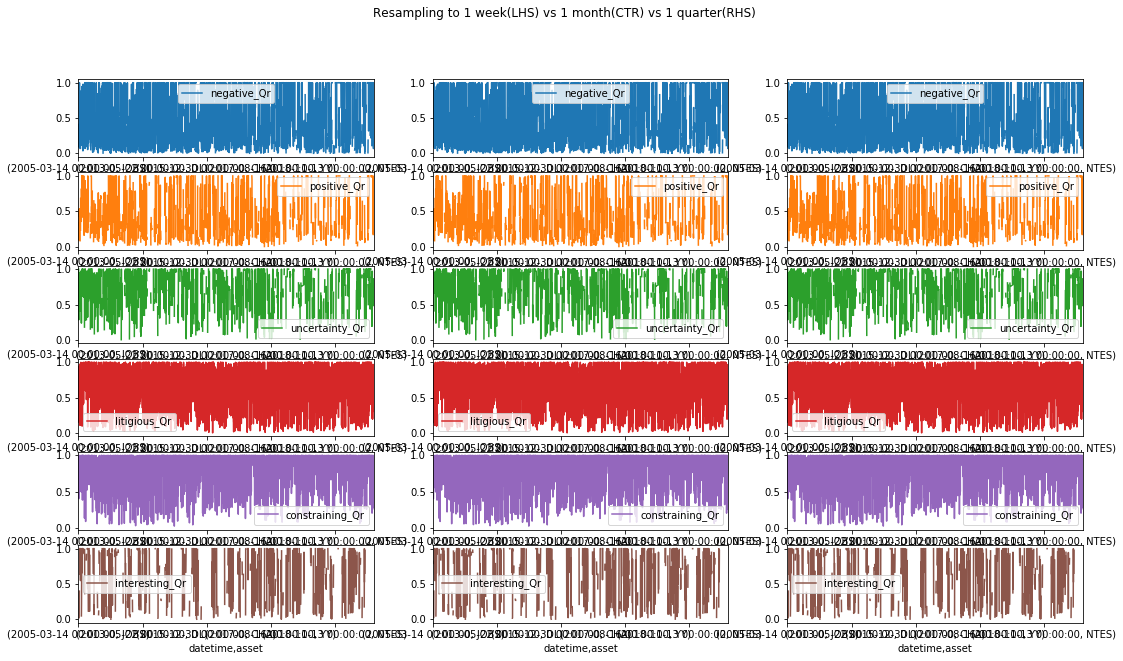

In [41]:
fig, axes = plt.subplots(nrows=6,ncols=3,figsize=(18,10))
resampled6K_weekly.plot(ax = axes[:,0],subplots=True)
resampled6K_monthly.plot(ax = axes[:,1],subplots=True, title="Resampling to 1 week(LHS) vs 1 month(CTR) vs 1 quarter(RHS)")
resampled6K_quarterly.plot(ax = axes[:,2],subplots=True)
plt.show()

# Decided to not resample the SEC sentiment factors

In [42]:
factors6K = fd_6K
factors20F = fd_20F

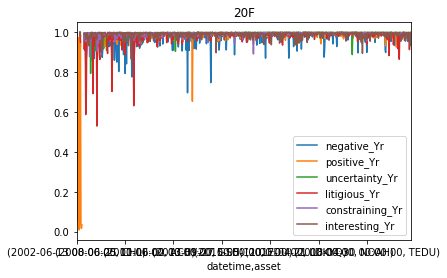

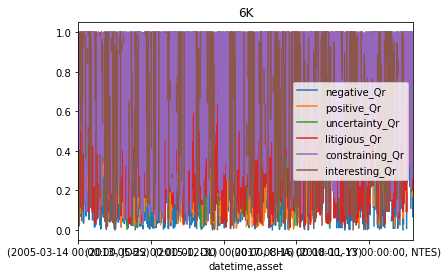

In [43]:
factors20F.plot(title="20F")
factors6K.plot(title="6K")

In [44]:
factors20F.head()

,,negative_Yr,positive_Yr,uncertainty_Yr,litigious_Yr,constraining_Yr,interesting_Yr
datetime,asset,,,,,,
2002-06-13,CHL,0.940365,0.953912,0.993711,0.990532,0.982694,0.995986
2003-05-13,CEO,0.967035,0.980075,0.987644,0.994199,0.993801,0.995815
2003-06-16,HNP,NaN,0.056585,NaN,NaN,NaN,NaN
2003-06-17,CHL,0.938671,0.973900,0.990295,0.983164,0.983497,0.994052
2003-06-19,SNP,NaN,0.032147,NaN,NaN,NaN,NaN


# Now add in the marketcap as factor

The most recent version of price data is stored in the "price.pckl" file

In [45]:
f = open('./data/price.pckl', 'rb')
mc = dill.load(f)
f.close()
mc = pd.DataFrame(mc.marketcap).marketcap
mc = mc.reset_index()
mc['datetime'] = pd.DatetimeIndex(mc['datetime']).tz_localize(None)
mc['datetime'] = pd.DatetimeIndex(mc['datetime']).date
mc = mc.set_index(["datetime", "asset"])
mc.head()

,,marketcap
datetime,asset,
2018-09-12,YI,17969959.80
2018-09-13,YI,9575412.00
2018-09-14,YI,10820523.53
2018-09-17,YI,2685648.84
2018-09-18,YI,3384564.30


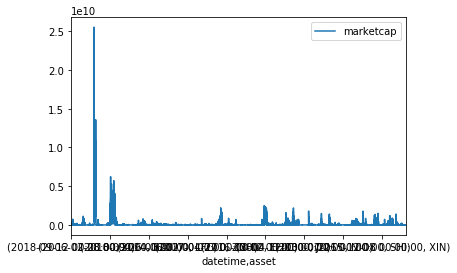

In [46]:
mc.plot()

## Inner join to select the top 20 assets with most data

In [47]:
# newscopy = news.copy()

In [48]:
news = timezoneset(news)
mc = timezoneset(mc)

In [59]:
factors6K.sort_index()

,,negative_Qr,positive_Qr,uncertainty_Qr,litigious_Qr,constraining_Qr,interesting_Qr
datetime,asset,,,,,,
2005-03-14,JOBS,1.000000,NaN,NaN,0.568559,1.000000,NaN
2005-05-27,JOBS,NaN,NaN,1.000000,0.933991,1.000000,NaN
2005-08-03,NTES,0.092385,0.096290,0.283408,0.158368,0.415935,0.513153
2005-09-20,NTES,0.396362,0.331327,0.835140,0.746097,0.405920,NaN
2005-11-08,NTES,0.409967,0.307401,0.856425,0.765489,0.405920,NaN
2005-11-29,NTES,0.240767,0.530653,0.878388,0.694753,0.502930,0.022168
2006-02-24,NTES,0.199922,0.484125,0.947192,0.706226,0.619745,0.024086
2006-03-21,NTES,0.286291,0.433841,0.939189,0.728997,0.606983,0.398841
2006-04-05,JOBS,1.000000,NaN,NaN,0.960672,1.000000,NaN


In [57]:
factors20F

negative_Yr  positive_Yr  uncertainty_Yr  litigious_Yr  \
datetime   asset                                                           
2002-06-13 CHL       0.940365     0.953912        0.993711      0.990532   
2003-05-13 CEO       0.967035     0.980075        0.987644      0.994199   
2003-06-16 HNP            NaN     0.056585             NaN           NaN   
2003-06-17 CHL       0.938671     0.973900        0.990295      0.983164   
2003-06-19 SNP            NaN     0.032147             NaN           NaN   
2003-06-23 ACH            NaN     0.008700             NaN           NaN   
           CHU            NaN     0.022371             NaN           NaN   
2003-06-25 ACH       0.995030     0.999768        0.999822      0.999847   
           PTR       0.930102     0.986088        0.985490      0.949408   
2003-06-26 CEA            NaN     0.043661             NaN           NaN   
           GSH            NaN     0.015961             NaN           NaN   
2003-06-27 NTES           NaN     0.034212             NaN           NaN   
           YZCAY          NaN          NaN             NaN           NaN   
2003-06-30 SHI            NaN     0.080963             NaN           NaN   
           ZNH            NaN          NaN             NaN           NaN   
2004-03-31 CHA       0.964234     0.983917        0.996286      0.916871   
2004-04-16 HNP       0.957480     0.959342        0.983840      0.985144   
2004-06-17 CHL       0.910112     0.965168        0.994110      0.968860   
           SHI       0.978748     0.978413        0.993268      0.972840   
2004-06-22 SNP       0.813380     0.937073        0.930909      0.587559   
2004-06-23 CEO       0.862078     0.874202        0.895303      0.666489   
2004-06-24 CHU       0.912547     0.979867        0.995206      0.992546   
2004-06-28 CEA       0.955363     0.990378        0.997272      0.969905   
           PTR       0.969725     0.989809        0.995981      0.994296   
2004-06-29 GSH       0.970062     0.978282        0.995109      0.965386   
           NTES      0.961333     0.967734        0.997586      0.955688   
2004-06-30 ACH       0.978311     0.960987        0.993837      0.980633   
           YZCAY     0.928497     0.958411        0.972224      0.944051   
           ZNH       0.917832     0.963674        0.996404      0.945871   
2005-04-18 HNP       0.973280     0.971687        0.793729      0.960350   
...                       ...          ...             ...           ...   
2019-04-26 YY        0.993823     0.986572        0.999089      0.992880   
           ZNH       0.958989     0.982915        0.995435      0.917445   
           ZXAIY     0.989780     0.997468        0.998980      0.997775   
2019-04-29 CHA       0.913804     0.969260        0.994388      0.946424   
           CHL       0.979934     0.987609        0.996557      0.864719   
           LITB      0.986865     0.985850        0.999649      0.991455   
           NCTY      0.993559     0.988778        0.999216      0.994002   
           PTR       0.984552     0.985473        0.997756      0.964974   
           SECO      0.993911     0.995562        0.999386      0.997856   
           SHI       0.973438     0.976724        0.989149      0.988649   
           SNP       0.986895     0.985837        0.995424      0.987604   
           SOL       0.996204     0.993158        0.999604      0.978545   
           WB        0.996147     0.994432        0.999735      0.995173   
           XIN       0.982434     0.976278        0.997409      0.991114   
           XNET      0.995821     0.990571        0.999830      0.997166   
           YRD       0.976287     0.987273        0.998371      0.965304   
2019-04-30 AMCN      0.976394     0.980557        0.999484      0.995690   
           ATV       0.980775     0.989508        0.998966      0.981978   
           CCM       0.992010     0.989569        0.998377      0.995403   
           FANH      0.972789     0.975842        0.997490      0.

In [49]:
innerjoin_20F_6K = pd.merge(factors20F, factors6K, left_index=True, right_index=True, how='inner')
innerjoin_20F_news = pd.merge(factors20F, news, left_index=True, right_index=True, how='inner')
innerjoin_6K_news = pd.merge(factors6K, news, left_index=True, right_index=True, how='inner')
innerjoin_20F_6K_news = pd.merge(innerjoin_20F_news, innerjoin_6K_news, left_index=True, right_index=True, how='inner')

In [50]:
innerjoin_20F_6K.shape

(39, 12)

In [51]:
innerjoin_20F_news.shape

(93, 11)

In [52]:
innerjoin_6K_news.shape

(675, 11)

In [53]:
innerjoin_20F_6K_news.shape

(16, 22)

In [54]:
innerjoin_6K_news.reset_index().groupby("asset").asset.count().shape

(79,)

In [55]:
innerjoin_20F_news.reset_index().groupby("asset").asset.count().shape

(52,)

In [56]:
innerjoin_20F_6K_news.reset_index().groupby("asset").asset.count().shape

(9,)

In [257]:
innerjoin_20F_6K_news

negative_Yr  positive_Yr  uncertainty_Yr  litigious_Yr  \
datetime   asset                                                           
2017-04-21 CEO       0.987518     0.986154        0.997814      0.991042   
2017-04-27 PTR       0.976996     0.988922        0.998897      0.989491   
2017-06-28 AMCN      0.977375     0.982701        0.999226      0.986128   
2017-10-25 HLG       0.986683     0.995744        0.999515      0.982948   
2018-03-12 HCM       0.992072     0.993999        0.998920      0.998910   
2018-04-19 CEO       0.985568     0.981598        0.998345      0.972435   
2018-04-27 CHA       0.896160     0.988952        0.997961      0.983882   
           PTR       0.989327     0.956729        0.997199      0.986021   
2018-05-14 RENN      0.987070     0.993319        0.999289      0.992921   
2019-03-11 HCM       0.996900     0.991770        0.999193      0.994718   
2019-03-15 BIDU      0.977993     0.978011        0.998315      0.989712   
2019-04-18 VIPS      0.993528     0.984454        0.999673      0.993018   
2019-04-23 CEO       0.982163     0.976324        0.997811      0.973803   
2019-04-29 CHA       0.913804     0.969260        0.994388      0.946424   
           PTR       0.984552     0.985473        0.997756      0.964974   
2019-05-15 RENN      0.979159     0.954318        0.996333      0.989468   

                  constraining_Yr  interesting_Yr  StrongNegative1D_x  \
datetime   asset                                                        
2017-04-21 CEO           0.998076        0.986262                 NaN   
2017-04-27 PTR           0.994310        0.998250                 NaN   
2017-06-28 AMCN          0.995178        0.992956                 NaN   
2017-10-25 HLG           0.995886        0.998012                 NaN   
2018-03-12 HCM           0.998720        0.994166                 NaN   
2018-04-19 CEO           0.998855        0.966306                 NaN   
2018-04-27 CHA           0.998173        0.998198                 NaN   
           PTR           0.999379        0.962660                32.0   
2018-05-14 RENN          0.996006        0.995431                 NaN   
2019-03-11 HCM           0.998515        0.995424                 NaN   
2019-03-15 BIDU          0.993768        0.991277                 NaN   
2019-04-18 VIPS          0.995874        0.999389                 NaN   
2019-04-23 CEO           0.999012        0.979748                 NaN   
2019-04-29 CHA           0.995337        0.984286                 NaN   
           PTR           0.998138        0.954344                28.0   
2019-05-15 RENN          0.972116        0.930912                 NaN   

                  WeakNegative1D_x  Neutral1D_x  WeakPositive1D_x  ...  \
datetime   asset                                                   ...   
2017-04-21 CEO                 NaN         10.0               NaN  ...   
2017-04-27 PTR                 7.0         21.0               NaN  ...   
2017-06-28 AMCN                NaN          6.0               NaN  ...   
2017-10-25 HLG                 NaN          1.0               2.0  ...   
2018-03-12 HCM                 NaN          3.0               NaN  ...   
2018-04-19 CEO                 NaN         20.0              20.0  ...   
2018-04-27 CHA                 NaN          4.0               NaN  ...   
           PTR                 NaN        240.0              64.0  ...   
2018-05-14 RENN                NaN          2.0               2.0  ...   
2019-03-11 HCM                 NaN          3.0               NaN  ...   
2019-03-15 BIDU                NaN         53.0              53.0  ...   
2019-04-18 VIPS                NaN          NaN               NaN  ...   
2019-04-23 CEO                 NaN         56.0               NaN  ...   
2019-04-29 CHA                 NaN          4.0               NaN  ...   
           PTR                 NaN          NaN              17.0  ...   
2019-05-15 RENN                NaN          NaN               NaN  ...   

 

In [258]:
innerjoin_20F_6K_news.reset_index().groupby("asset").asset.count()

asset
AMCN    1
BIDU    1
CEO     3
CHA     2
HCM     2
HLG     1
PTR     3
RENN    2
VIPS    1
Name: asset, dtype: int64

## Outer join to obtain all_factors table

In [56]:
outerjoin_20F_6K = pd.merge(factors20F, factors6K, left_index=True, right_index=True, how='outer')
outerjoin_20F_6K_news = pd.merge(outerjoin_20F_6K, news, left_index=True, right_index=True, how='outer')
all_factors = pd.merge(outerjoin_20F_6K_news, mc, left_index=True, right_index=True, how='outer').fillna(0)

In [ ]:
pf.create_returns_tear_sheet(stock_rets, live_start_date='2015-12-1')

In [51]:
features = ['negative_Yr', 'positive_Yr', 'uncertainty_Yr', 'litigious_Yr','constraining_Yr', 'interesting_Yr',\
            'negative_Qr', 'positive_Qr', 'uncertainty_Qr', 'litigious_Qr', 'constraining_Qr', 'interesting_Qr',\
             'StrongNegative1D', 'WeakNegative1D', 'Neutral1D', 'WeakPositive1D','StrongPositive1D', 'marketcap']

In [52]:
with open("./data/all_factors.pckl", "wb") as f:
    dill.dump(all_factors, f)

# START HERE TO WORK WITH CLEAN VERSION OF RAW FACTORS

In [57]:
# To SAVE
clean_factorsOnly = all_factors.copy()

In [58]:
# To RETRIEVE
all_factors = clean_factorsOnly

# Factor quantile calculation

In [55]:
all_factors['positive_Yr'].groupby("asset")#.reset_index()

The quantiles are choosen to have the same number of records each, but the same value cannot span multiple quantiles. Possible workarounds are:
1. Decrease the number of quantiles
2. Specify a custom quantiles range, e.g. [0, .50, .75, 1.] to get unequal number of records per quantile
3. Use 'bins' option instead of 'quantiles', 'bins' chooses the buckets to be evenly spaced according to the values themselves, while 'quantiles' forces the buckets to have the same number of records.
4. for factors with discrete values use the 'bins' option with custom ranges and create a range for each discrete value

see utils.get_clean_factor_and_forward_returns documentation for full documentation of 'bins' and 'quantiles' options.

##### quantiles : int or sequence[float]
        Number of equal-sized quantile buckets to use in factor bucketing.
        Alternately sequence of quantiles, allowing non-equal-sized buckets
        e.g. [0, .10, .5, .90, 1.] or [.05, .5, .95]
        Only one of 'quantiles' or 'bins' can be not-None
##### bins : int or sequence[float]
        Number of equal-width (valuewise) bins to use in factor bucketing.
        Alternately sequence of bin edges allowing for non-uniform bin width
        e.g. [-4, -2, -0.5, 0, 10]
        Only one of 'quantiles' or 'bins' can be not-None

def quantile_calc(x, _quantiles, _bins, _zero_aware, _no_raise):
        try:
            if _quantiles is not None and _bins is None and not _zero_aware:
                return pd.qcut(x, _quantiles, labels=False) + 1
            elif _quantiles is not None and _bins is None and _zero_aware:
                pos_quantiles = pd.qcut(x[x >= 0], _quantiles // 2,
                                        labels=False) + _quantiles // 2 + 1
                neg_quantiles = pd.qcut(x[x < 0], _quantiles // 2,
                                        labels=False) + 1
                return pd.concat([pos_quantiles, neg_quantiles]).sort_index()

            elif _bins is not None and _quantiles is None and not _zero_aware:
                return pd.cut(x, _bins, labels=False) + 1

            elif _bins is not None and _quantiles is None and _zero_aware:
                pos_bins = pd.cut(x[x >= 0], _bins // 2,
                                  labels=False) + _bins // 2 + 1
                neg_bins = pd.cut(x[x < 0], _bins // 2,
                                  labels=False) + 1
                return pd.concat([pos_bins, neg_bins]).sort_index()
        except Exception as e:
            if _no_raise:
                return pd.Series(index=x.index)
            raise e

grouper = [all_factors.index.get_level_values('datetime')]

factor_quantile = factor_data.groupby("asset")['factor'].apply(quantile_calc, quantiles, bins, zero_aware, no_raise)
factor_quantile.name = 'factor_quantile'

    return factor_quantile.dropna()

Separate into 5 bins, no quantile

In [306]:
for i in features:
    x = all_factors[i].groupby("asset")
    pd.to_numeric(x, errors='coerce')#.fillna(0)
    pos_bins = pd.qcut(x[x >= 0], 2,labels=False, duplicates='drop').apply(lambda x: x+3)
    neg_bins = pd.qcut(x[x < 0], 2, labels=False, duplicates='drop').apply(lambda x: x + 1)
    zeroAware_bins = pd.concat([pos_bins, neg_bins]).sort_index()

    nonZeroAware_bins = pd.qcut(x, 5, labels=False, duplicates='drop').apply(lambda x: x + 1)

TypeError: '>=' not supported between instances of 'SeriesGroupBy' and 'int'

Quantile calculation, no binning

In [301]:
for i in features:
    x = all_factors[i]
    pd.to_numeric(x, errors='coerce').fillna(0)

    pos_quantiles = pd.qcut(x[x >= 0], 2,labels=False,duplicates='drop').apply(lambda x: x+3)
    neg_quantiles = pd.qcut(x[x < 0], 2, labels=False,duplicates='drop').apply(lambda x: x + 1)
    zeroAware_quantiles = pd.concat([pos_quantiles, neg_quantiles]).sort_index()

    nonZeroAware_quantiles = pd.qcut(x, 5, labels=False, duplicates='drop').apply(lambda x: x + 1)

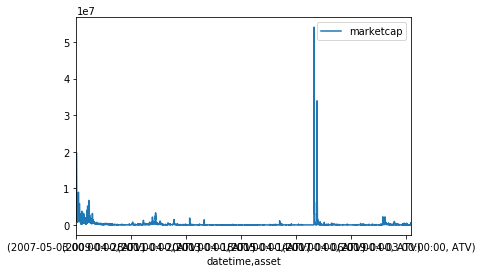

In [73]:
idx = pd.IndexSlice

mc.loc[idx[:,'ATV'],:].plot()

In [ ]:
 grouper = [factor_data.index.get_level_values('date')]
    if by_group:
        grouper.append('group')

In [ ]:
from alphalens.utils import get_clean_factor_and_forward_returns
get_clean_factor_and_forward_returns(all_factors, price,filter_zscore=None,max_loss=50,periods=[1])

# Calculating trailing returns

In [62]:
#makes a copy of factors
clean_factorsOnly = all_factors.copy()

In [144]:
#revert to this setpoint
all_factors=clean_factorsOnly.copy()

In [60]:
f = open('./data/price.pckl', 'rb')
price= dill.load(f)
f.close()

price = pd.DataFrame(price.adj_close).adj_close
price = price.reset_index()
price['datetime'] = pd.DatetimeIndex(price['datetime']).tz_localize(None)
price = price.set_index(["datetime", "asset"])

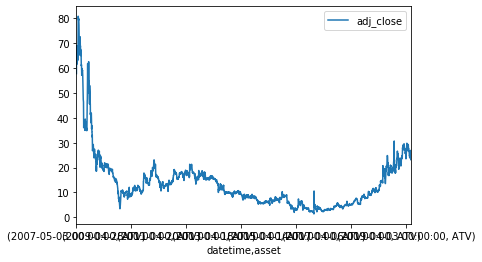

In [66]:
idx =pd.IndexSlice

price.loc[idx[:,'ATV'],:].plot()

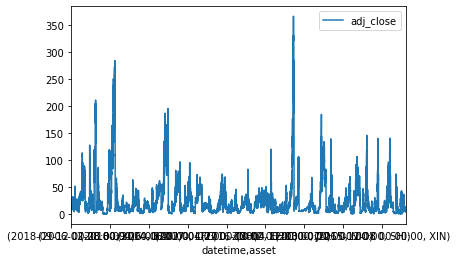

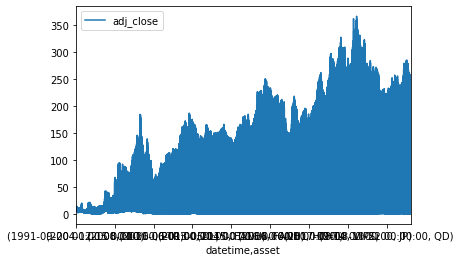

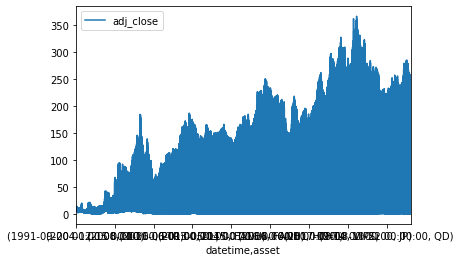

In [61]:
def resample_price_data(factors,resampletime):
    ufactors = factors.unstack()
    ufactors = ufactors.set_index(pd.DatetimeIndex(ufactors.index)).asfreq(resampletime)
#     ufactors = pf.utils.to_utc(ufactors) 
    factors = ufactors.stack()
    factors[np.isclose(factors,0)]=np.nan
    return factors

price_resampledB =resample_price_data(price, "B")
price_resampledC =resample_price_data(price, "C")

price.plot()
price_resampledB.plot()
price_resampledC.plot()

It was decided to resample price as frequency C

### Shift Target
We'll use shifted 5 day returns for training the model.

In [296]:
price['price']=price.groupby(level='asset')['adj_close'].fillna(method='ffill').fillna(method='bfill')

price['return_1d'] = price.groupby(level='asset')['adj_close'].pct_change(1).fillna(method='ffill').fillna(method='bfill')
price['forward_return_1d']= price['return_1d'].shift(-1)

price['return_5d'] = price.groupby(level='asset')['adj_close'].pct_change(5).fillna(method='ffill').fillna(method='bfill')
price['forward_return_5d']= price['return_5d'].shift(-5)

price['return_15d'] = price.groupby(level='asset')['adj_close'].pct_change(15).fillna(method='ffill').fillna(method='bfill')
price['forward_return_15d']= price['return_15d'].shift(-15)

price['return_30d'] = price.groupby(level='asset')['adj_close'].pct_change(30).fillna(method='ffill').fillna(method='bfill')
price['forward_return_30d']= price['return_30d'].shift(-30)

price['return_90d'] = price.groupby(level='asset')['adj_close'].pct_change(90).fillna(method='ffill').fillna(method='bfill')
price['forward_return_30d']= price['return_30d'].shift(-90)

price['return_165d'] = price.groupby(level='asset')['adj_close'].pct_change(165).fillna(method='ffill').fillna(method='bfill')
price['forward_return_165d']= price['return_165d'].shift(-165)

price['target']=price['forward_return_15d']
y= price['target']

In [297]:
price.head()

,,adj_close,return_1d,forward_return_1d,return_5d,forward_return_5d,return_15d,forward_return_15d,return_30d,forward_return_30d,return_90d,return_165d,forward_return_165d,target,price
datetime,asset,,,,,,,,,,,,,,
2018-09-12,YI,13.80,0.014493,0.014493,0.001449,0.001449,-0.176449,-0.176449,-0.413043,0.075697,-0.413043,-0.419565,-0.419565,-0.176449,13.80
2018-09-13,YI,14.00,0.014493,-0.000714,0.001449,-0.035000,-0.176449,-0.228571,-0.413043,0.173333,-0.413043,-0.419565,-0.425714,-0.228571,14.00
2018-09-14,YI,13.99,-0.000714,-0.019299,0.001449,0.103645,-0.176449,-0.133667,-0.413043,0.242857,-0.413043,-0.419565,-0.417441,-0.133667,13.99
2018-09-17,YI,13.72,-0.019299,-0.048105,0.001449,0.079446,-0.176449,-0.151603,-0.413043,0.212514,-0.413043,-0.419565,-0.398324,-0.151603,13.72
2018-09-18,YI,13.06,-0.048105,0.058193,0.001449,0.077335,-0.176449,-0.146248,-0.413043,0.378626,-0.413043,-0.419565,-0.354900,-0.146248,13.06


Note on Trailing Returns:
A trailing return looks backward from a particular date for a fund's annualized return over a specific time period--usually ending on the last day of the most recent day, month, quarter, or year. Note that dividend has been considered in the adjusted close price. The adjusted closing price shows the stock's value after posting a dividend. For example, if a share with a closing price of $100 paid a $5 dividend per share, the adjusted closing price would be $95 in order to account for the newly reduced value caused by the dividend.

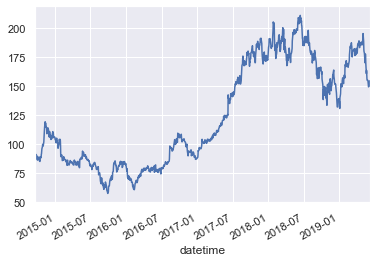

In [339]:
price.adj_close.loc[:,'BABA'].plot()
# price.forward_return_165d.loc[:,'BABA'].plot()

In [298]:
#save a checkpoint
with open ("./data/trailing_return.pckl", "wb") as f:
    dill.dump(price, f)

To predict the go forward 1-week return, it's important to quantize the target. The factor we create is the trailing 5-day return.

In [266]:
#visual verification of the calculations

# idx = pd.IndexSlice
# price.loc[idx[:,'YI'],['daily_return','forward_return_1d']].plot()

## (price_non.loc[idx[:,['BIDU','BABA']]]-price.loc[idx[:,['BIDU','BABA']],'daily_return']).plot()

##### Merge target with features

In [299]:
all_factors=pd.merge(all_factors, price[['price', 'target', 'return_15d']], left_index=True, right_index=True, how='outer').fillna(0)

In [300]:

all_factors.head()

,,negative_Yr,positive_Yr,uncertainty_Yr,litigious_Yr,constraining_Yr,interesting_Y,negative_Qr,positive_Qr,uncertainty_Qr,litigious_Qr,...,WeakPositive1D,StrongPositive1D,marketcap,target_x,return_15d_x,target_y,return_15d_y,price,target,return_15d
datetime,asset,,,,,,,,,,,,,,,,,,,,,
1991-09-20,NIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.068301e+06,-0.008,0.039828,-0.008,0.039828,5.498206,-0.008,0.039828
1991-09-23,NIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.498206e+05,-0.008,0.039828,-0.008,0.039828,5.498206,-0.008,0.039828
1991-09-24,NIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.299597e+05,-0.008,0.039828,-0.008,0.039828,5.498206,-0.008,0.039828
1991-09-25,NIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.024013e+05,0.000,0.039828,0.000,0.039828,5.498206,0.000,0.039828
1991-09-26,NIO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.929870e+05,-0.008,0.039828,-0.008,0.039828,5.498206,-0.008,0.039828


# Using alphalens

In [ ]:
# all_factors[i].groupby(['datetime'])['asset'].count().to_frame().rename(columns=[i]).reset_index()

In [334]:
af = all_factors[i].copy().fillna(0)
af = af.reset_index()
af.datetime = pd.DatetimeIndex(af.datetime).tz_localize('UTC')
af = af.set_index("datetime", "asset")
af.remove_unused_levels()
af.head()

ap = all_factors['price'].copy().fillna(0)
ap = ap.reset_index()
ap.datetime = pd.DatetimeIndex(ap.datetime).tz_localize('UTC')
ap = ap.set_index("datetime", "asset")
af.remove_unused_levels()
ap.head()

AttributeError: 'DataFrame' object has no attribute 'remove_unused_levels'

In [ ]:
alphalensfactors.datetime = pd.DatetimeIndex(alphalensfactors.)

In [331]:
af.index.tz

<UTC>

In [332]:
af.index.levels[0]

AttributeError: 'DatetimeIndex' object has no attribute 'levels'

In [328]:
from alphalens.utils import get_clean_factor_and_forward_returns
# for i in features:
i = 'negative_Yr'
get_clean_factor_and_forward_returns(af, ap, filter_zscore=None, max_loss=50)

AttributeError: 'DatetimeIndex' object has no attribute 'levels'

In [269]:
p_df = pd.DataFrame()
coe_df = pd.DataFrame()

for i in features:
    p_df[i] = spearmanr(all_factors[i], all_factors['target'], axis=1)

In [270]:
p_df

,negative_Yr,positive_Yr,uncertainty_Yr,litigious_Yr,constraining_Yr,interesting_Y,negative_Qr,positive_Qr,uncertainty_Qr,litigious_Qr,constraining_Qr,interesting_Qr,StrongNegative1D,WeakNegative1D,Neutral1D,WeakPositive1D,StrongPositive1D
0,-0.003169,-0.002419,-0.003172,-0.003172,-0.003176,-0.003170,0.001255,0.001562,0.001533,-0.001166,-0.001144,0.003588,-0.002028,-0.002651,-0.006111,-1.097743e-02,-0.000722
1,0.137565,0.257128,0.137253,0.137257,0.136804,0.137458,0.556520,0.464330,0.472538,0.584842,0.592053,0.092747,0.342120,0.214278,0.004197,2.699599e-07,0.735100


In [271]:
factor = all_factors.copy()
factor.reset_index().to_csv('./data/all_factors.csv')

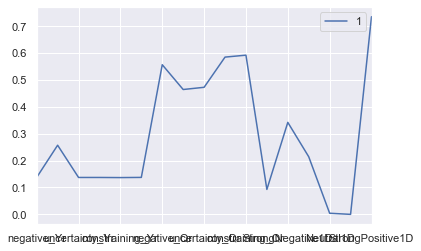

In [272]:
pd.DataFrame(p_df.loc[1,:]).plot()

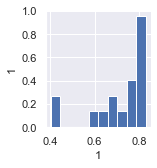

In [99]:
import abc

from sklearn.ensemble import VotingClassifier
from sklearn.base import clone
from cesklearn.preprossing import LabelEncoder
from sklearn.utils import Bunch


class NoOverlapVoterAbstract(VotingClassifier):
    @abc.abstractmethod
    def _calculate_oob_score(self, classifiers):
        raise NotImplementedError
        
    @abc.abstractmethod
    def _non_overlapping_estimators(self, x, y, classifiers, n_skip_samples):
        raise NotImplementedError
    
    def __init__(self, estimator, voting='soft', n_skip_samples=4):
        # List of estimators for all the subsets of data
        estimators = [('clf'+str(i), estimator) for i in range(n_skip_samples + 1)]
        
        self.n_skip_samples = n_skip_samples
        super().__init__(estimators, voting)
    
    def fit(self, X, y, sample_weight=None):
        estimator_names, clfs = zip(*self.estimators)
        self.le_ = LabelEncoder().fit(y)
        self.classes_ = self.le_.classes_
        
        clone_clfs = [clone(clf) for clf in clfs]
        self.estimators_ = self._non_overlapping_estimators(X, y, clone_clfs, self.n_skip_samples)
        self.named_estimators_ = Bunch(**dict(zip(estimator_names, self.estimators_)))
        self.oob_score_ = self._calculate_oob_score(self.estimators_)
        
        return self

### Check for return independence and identical distribution

In [112]:
def sp(group, col1_name, col2_name):
    x = group[col1_name]
    y = group[col2_name]
    return spearmanr(x, y)[0]

In [113]:
all_factors['target_1'] = all_factors.groupby(level=1)['return_15d'].shift(-4)
all_factors['target_2'] = all_factors.groupby(level=1)['return_15d'].shift(-3)
all_factors['target_3'] = all_factors.groupby(level=1)['return_15d'].shift(-2)
all_factors['target_4'] = all_factors.groupby(level=1)['return_15d'].shift(-1)

In [114]:
g = all_factors.dropna().groupby(level=0)
for i in range(4):
    label = 'target_'+str(i+1)
    ic = g.apply(sp, 'target', label)
    ic.plot(ylim=(-1, 1), label=label)

plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.title('Rolling Autocorrelation of Labels Shifted 1,2,3,4 Days')
plt.show()

TypeError: Cannot compare tz-naive and tz-aware timestamps

In [ ]:
# all_factors['target_p'] = all_factors.groupby(level=1)['return_5d_p'].shift(-5)
# return_5d is usually calculated with quantiles(2) whereas 'return_5d_p' is calculated with quantiles(25)?

### Train/Valid/Test Splits for Multi-index dataframes - must not split between any day
Custom splitting is necessary to ensure there is no spliting of data on a particular day. The `train_size` is 0.7, `valid_size` is 0.2, and `test_size` is 0.1. The first 70 percent of `all_x` and `all_y` would be the train set. The next 20 percent of `all_x` and `all_y` would be the validation set. The last 10 percent of `all_x` and `all_y` would be the test set.

In [1284]:
def train_valid_test_split(all_x, all_y, train_size, valid_size, test_size):

    assert train_size >= 0 and train_size <= 1.0
    assert valid_size >= 0 and valid_size <= 1.0
    assert test_size >= 0 and test_size <= 1.0
    assert train_size + valid_size + test_size == 1.0

    train_length = int(len(all_x.index.levels[0])*train_size)
    valid_length = int(len(all_x.index.levels[0])*valid_size)
    train_indexes = all_x.index.levels[0][:train_length]
    valid_indexes = all_x.index.levels[0][train_length:train_length+valid_length]
    test_indexes = all_x.index.levels[0][train_length+valid_length:]
    
    x_train = all_x.loc[train_indexes[0]:train_indexes[-1]]
    x_valid = all_x.loc[valid_indexes[0]:valid_indexes[-1]]
    x_test = all_x.loc[test_indexes[0]:test_indexes[-1]]
    
    y_train = all_y.loc[train_indexes[0]:train_indexes[-1]]
    y_valid = all_y.loc[valid_indexes[0]:valid_indexes[-1]]
    y_test = all_y.loc[test_indexes[0]:test_indexes[-1]]
    
    return x_train, x_valid, x_test, y_train, y_valid, y_test

In [1286]:
target_label = 'target'
temp = all_factors.dropna().copy()
X = temp[features]
y = temp[target_label]

X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(X, y, 0.6, 0.2, 0.2)

X_train.head()

,,negative_Yr,positive_Yr,uncertainty_Yr,litigious_Yr,constraining_Yr,interesting_Y,negative_Qr,positive_Qr,uncertainty_Qr,litigious_Qr,constraining_Qr,interesting_Qr,StrongNegative1D,WeakNegative1D,Neutral1D,WeakPositive1D,StrongPositive1D
datetime,asset,,,,,,,,,,,,,,,,,
1991-09-20,NIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1991-09-23,NIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1991-09-24,NIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1991-09-25,NIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1991-09-26,NIO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


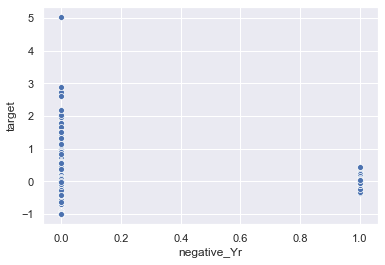

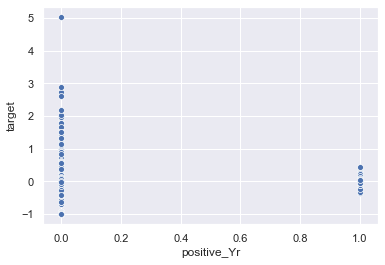

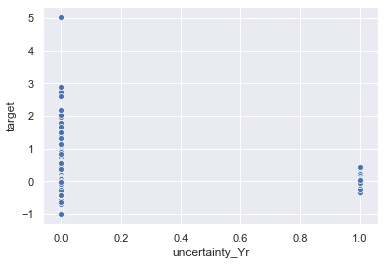

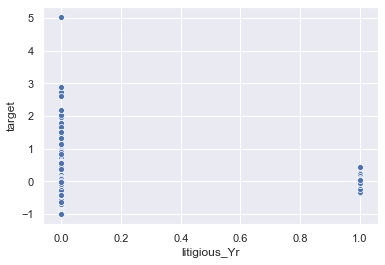

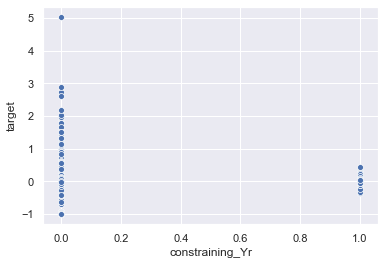

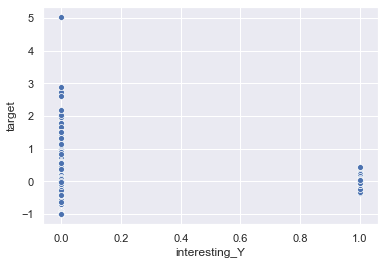

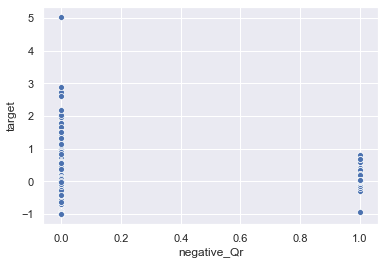

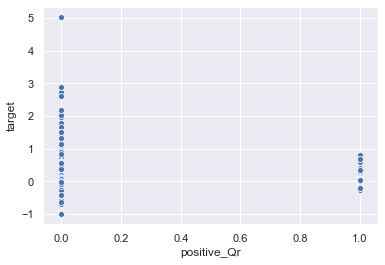

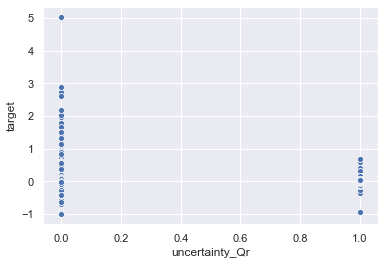

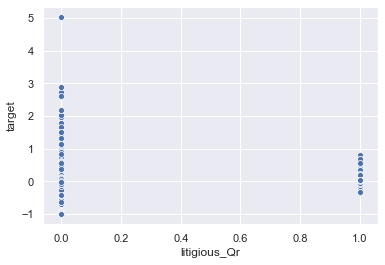

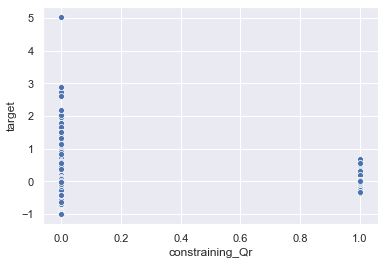

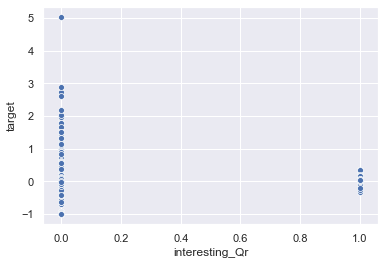

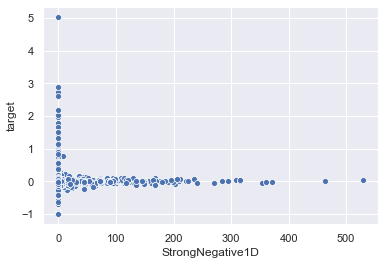

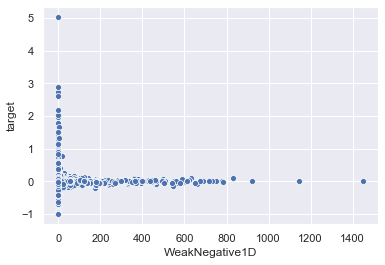

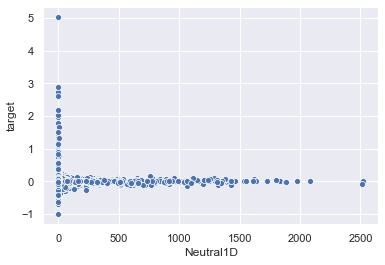

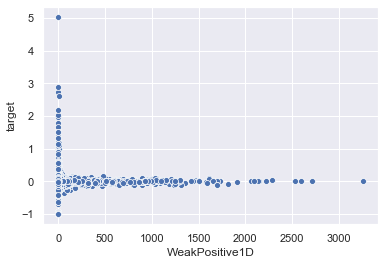

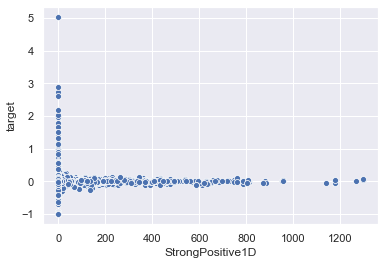

In [1249]:
for i in features:
    sns.scatterplot(x=i, y='target', data=all_factors)
    plt.show()

## Random Forests
### Visualize a Simple Tree

In [1291]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image

def plot_tree_classifier(clf, feature_names=None):
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_names,
        filled=True,
        rounded=True,
        special_characters=True,
        rotate=True)

    return Image(graphviz.Source(dot_data).pipe(format='png'))

In [1292]:
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
clf_random_state = 0 # This is to get consistent results between each run.

simple_clf = DecisionTreeClassifier(
    max_depth=3,
    criterion='entropy',
    random_state=clf_random_state)
simple_clf.fit(X_train, y_train)

display(plot_tree_classifier(simple_clf, feature_names=features))
rank_features_by_importance(simple_clf.feature_importances_, features)

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

# Random Forest to trial different tree sizes

In [1299]:
n_days = 10
n_stocks = 110

clf_parameters = {
    'criterion': 'entropy',
    'min_samples_leaf': n_stocks * n_days,
    'oob_score': True,
    'n_jobs': -1,
    'random_state': clf_random_state}
n_trees_l = [50, 100, 250, 500, 1000]

In [1300]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

train_score = []
valid_score = []
oob_score = []
feature_importances = []

for n_trees in tqdm(n_trees_l, desc='Training Models', unit='Model'):
    clf = RandomForestClassifier(n_trees, **clf_parameters)
    clf.fit(X_train, y_train)
    
    train_score.append(clf.score(X_train, y_train.values))
    valid_score.append(clf.score(X_valid, y_valid.values))
    oob_score.append(clf.oob_score_)
    feature_importances.append(clf.feature_importances_)

Training Models: 100%|██████████| 5/5 [00:17<00:00,  4.19s/Model]


To plot model results

In [1301]:
plot(
    [n_trees_l]*3,
    [train_score, valid_score, oob_score],
    ['train', 'validation', 'oob'],
    'Random Forrest Accuracy',
    'Number of Trees')

NameError: name 'plot' is not defined

In [1302]:
def rank_features_by_importance(importances, feature_names):
    indices = np.argsort(importances)[::-1]
    max_feature_name_length = max([len(feature) for feature in feature_names])

    print('      Feature{space: <{padding}}      Importance'.format(padding=max_feature_name_length - 8, space=' '))

    for x_train_i in range(len(importances)):
        print('{number:>2}. {feature: <{padding}} ({importance})'.format(
            number=x_train_i + 1,
            padding=max_feature_name_length,
            feature=feature_names[indices[x_train_i]],
            importance=importances[indices[x_train_i]]))

In [1303]:
print('Features Ranked by Average Importance:\n')
rank_features_by_importance(np.average(feature_importances, axis=0), features)

Features Ranked by Average Importance:

      Feature              Importance
 1. StrongPositive1D (0.0)
 2. positive_Qr      (0.0)
 3. positive_Yr      (0.0)
 4. uncertainty_Yr   (0.0)
 5. litigious_Yr     (0.0)
 6. constraining_Yr  (0.0)
 7. interesting_Y    (0.0)
 8. negative_Qr      (0.0)
 9. uncertainty_Qr   (0.0)
10. WeakPositive1D   (0.0)
11. litigious_Qr     (0.0)
12. constraining_Qr  (0.0)
13. interesting_Qr   (0.0)
14. StrongNegative1D (0.0)
15. WeakNegative1D   (0.0)
16. Neutral1D        (0.0)
17. negative_Yr      (0.0)


Some of the features of low to no importance. We will be removing them when training the final model.
### Model Results
Let's look at some additional metrics to see how well a model performs. The following are used to examine the model:
- Sharpe Ratios
- Factor Returns
- Factor Rank Autocorrelation

In [1304]:
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
from IPython.display import display
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1305]:
m = RandomForestRegressor(n_estimators=1, #make a single tree for the forest
                         max_depth=3, #make a small tree
                         bootstrap=False, #turn off randomising
                         n_jobs=-1)
m.fit(X_train, y_train)
print_score(m) #print R2

NameError: name 'print_score' is not defined

# Portfolio optimisation

In [126]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

f = open('./data/price.pckl', 'rb')
price= dill.load(f)
f.close()

price = pd.DataFrame(price.adj_close).adj_close
price = price.reset_index()
price['datetime'] = pd.DatetimeIndex(price['datetime'])
price = price.set_index(["datetime", "asset"]).stack()


# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(price)
S = risk_models.sample_cov(price)

# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

{0: 1.0}
Expected annual return: 31571.9%
Annual volatility: 917850.4%
Sharpe Ratio: 0.03


(315.71946593096214, 9178.503778712684, 0.03439552606200921)

In [ ]:
# To RETRIEVE
all_factors = clean_factorsOnly
# all_factors = all_factors.groupby('asset').apply(lambda x : x.groupby('datetime').mean())

all_factors = all_factors.swaplevel().unstack()
all_factors.head()

all_factors =  pf.utils.to_utc(all_factors.set_index(pd.to_datetime(all_factors.index))).stack()

In [512]:
news = pd.read_csv('./data/news_score_raw_withHeadlineAndMessageBody.csv')
news.head()

,Unnamed: 0,Unnamed: 0.1,asset,date,headline,message_body,score
0,0,NaN,VNET,2019-05-21 00:41:15+00:00,Edited Transcript of VNET earnings conference ...,Q1 2019 21Vianet Group Inc Earnings Call,1.073536
1,1,NaN,VNET,2019-05-17 15:44:20+00:00,Investors Who Bought 21Vianet Group (NASDAQ:VN...,"Long term investing works well, but it doesn't...",1.073536
2,2,NaN,VNET,2019-05-17 08:23:14+00:00,"21Vianet Group, Inc. (VNET) Q1 2019 Earnings C...",VNET earnings call for the period ending March...,1.073536
3,3,NaN,VNET,2019-05-16 20:43:27+00:00,21Vianet: 1Q Earnings Snapshot,BEIJING (AP) _ 21Vianet Group Inc. (VNET) on T...,1.073536
4,4,NaN,VNET,2019-05-16 20:30:00+00:00,"21Vianet Group, Inc. Reports Unaudited First Q...","BEIJING, May 17, 2019 -- 21Vianet Group, Inc. ...",1.073536


In [513]:
news = news.reset_index().drop(columns=['index','Unnamed: 0', 'Unnamed: 0.1'])

In [514]:
news.head()

,asset,date,headline,message_body,score
0,VNET,2019-05-21 00:41:15+00:00,Edited Transcript of VNET earnings conference ...,Q1 2019 21Vianet Group Inc Earnings Call,1.073536
1,VNET,2019-05-17 15:44:20+00:00,Investors Who Bought 21Vianet Group (NASDAQ:VN...,"Long term investing works well, but it doesn't...",1.073536
2,VNET,2019-05-17 08:23:14+00:00,"21Vianet Group, Inc. (VNET) Q1 2019 Earnings C...",VNET earnings call for the period ending March...,1.073536
3,VNET,2019-05-16 20:43:27+00:00,21Vianet: 1Q Earnings Snapshot,BEIJING (AP) _ 21Vianet Group Inc. (VNET) on T...,1.073536
4,VNET,2019-05-16 20:30:00+00:00,"21Vianet Group, Inc. Reports Unaudited First Q...","BEIJING, May 17, 2019 -- 21Vianet Group, Inc. ...",1.073536


In [501]:
news = news.set_index([pd.to_datetime(news.date),'asset'])['score']
# news.set_index())

In [502]:
resampled_news = news.groupby(['date','asset']).skew().sort_index(level=1)

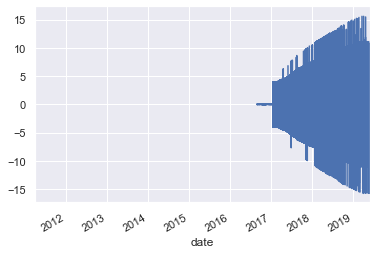

In [487]:
resampled_news.unstack()['BABA'].plot()

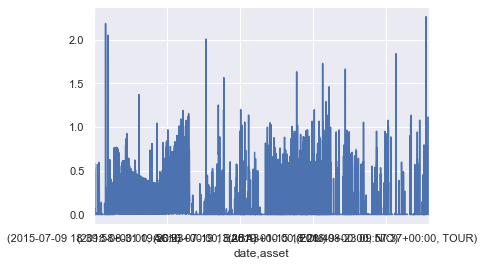

In [488]:
news.groupby(['date','asset']).std().sort_index(level=1).plot()

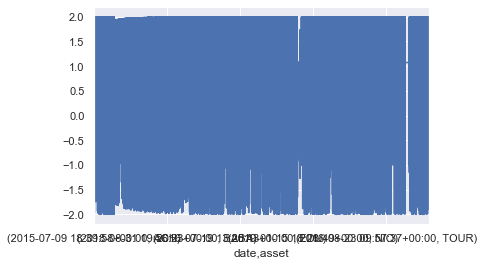

In [489]:
news.groupby(['date','asset']).mean().sort_index(level=1).plot()

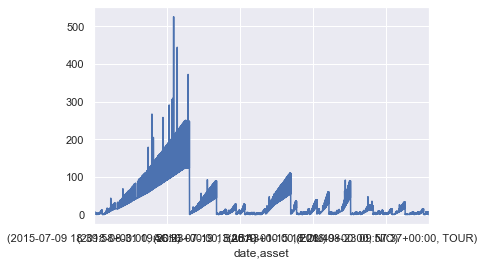

In [503]:
news.groupby(['date','asset']).count().sort_index(level=1).plot()

In [504]:
newsmedian_factor=news.groupby(['date','asset']).median().sort_index(level=1)

In [505]:
newsmean_factor=news.groupby(['date','asset']).mean().sort_index(level=1)

In [506]:
newscount_factor=news.groupby(['date','asset']).count().sort_index(level=1)